# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [7]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [9]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [13]:
# Extract all rows of data
table = soup.find("table")
rows = table.find_all("tr")

rows



[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [17]:
# Create an empty list
rows_data = []

# Loop through the scraped data to create a list of rows
data = []
for row in rows:
    cells = row.find_all(["th", "td"])
    data.append([cell.get_text(strip=True) for cell in cells])

for row in data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = data[0] 
rows = data[1:]    

# Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=columns)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [20]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [51]:
# Change data types for data analysis
df['id'] = pd.to_numeric(df['id']) 
df['sol'] = pd.to_numeric(df['sol'])  
df['min_temp'] = pd.to_numeric(df['min_temp']) 
df['pressure'] = pd.to_numeric(df['pressure'])
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  


print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                          object
month                       object
min_temp                   float64
pressure                   float64
mars_month                   int32
dtype: object


In [23]:
# Confirm type changes were successful by examining data types again
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# 1. How many months are there on Mars?
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
sols_per_month = 687 / 12
df['mars_month'] = (df['sol'] / sols_per_month).astype(int) + 1
unique_months = df['mars_month'].nunique()

print("Dataset:")
print(df)
print(f"\nNumber of unique Martian months in the dataset: {unique_months}")

Dataset:
        id terrestrial_date   sol   ls month min_temp pressure  mars_month
0        2       2012-08-16    10  155     6    -75.0    739.0           1
1       13       2012-08-17    11  156     6    -76.0    740.0           1
2       24       2012-08-18    12  156     6    -76.0    741.0           1
3       35       2012-08-19    13  157     6    -74.0    732.0           1
4       46       2012-08-20    14  157     6    -74.0    740.0           1
...    ...              ...   ...  ...   ...      ...      ...         ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0          35
1863  1892       2018-02-24  1974  134     5    -77.0    729.0          35
1864  1894       2018-02-25  1975  134     5    -76.0    729.0          35
1865  1893       2018-02-26  1976  135     5    -77.0    728.0          35
1866  1895       2018-02-27  1977  135     5    -77.0    727.0          35

[1867 rows x 8 columns]

Number of unique Martian months in the dataset: 35


In [28]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = df['sol'].max() - df['sol'].min() + 1
print(f"Total number of sols worth of data: {total_sols}")

Total number of sols worth of data: 1968


In [47]:
# 3. What is the average minimum temperature by month?
df['mars_month'] = (df['sol'] / sols_per_month).astype(int) + 1
average_min_temp_by_month = df.groupby('mars_month')['min_temp'].mean()
average_min_temp_by_month


mars_month
1    -74.363636
2    -70.192982
3    -65.315789
4    -67.566667
5    -70.000000
6    -73.263158
7    -77.142857
8    -80.777778
9    -85.244444
10   -85.491228
11   -83.105263
12   -78.964912
13   -75.103448
14   -71.350877
15   -69.666667
16   -71.693878
17   -72.792453
18   -75.418182
19   -77.684211
20   -79.842105
21   -84.448276
22   -86.070175
23   -80.636364
24   -75.578947
25   -73.102041
26   -69.736842
27   -71.912281
28   -73.087719
29   -73.509091
30   -75.392857
31   -77.491228
32   -79.428571
33   -79.810345
34   -78.929825
35   -77.354839
Name: min_temp, dtype: float64

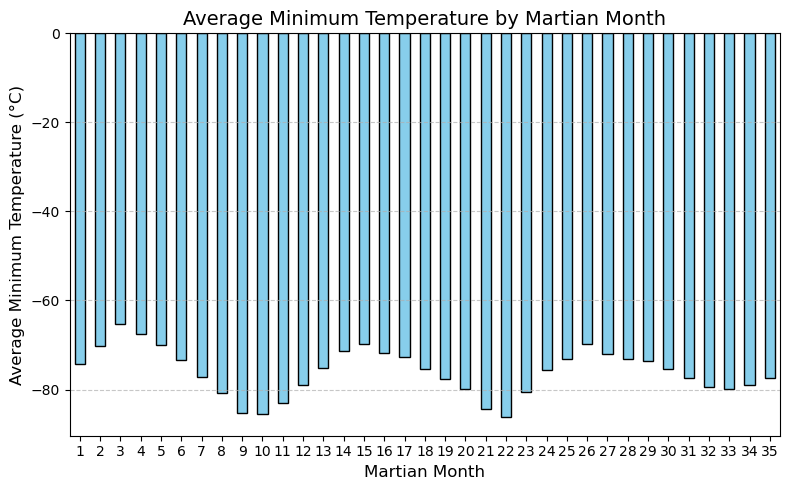

In [ ]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8, 5))
average_min_temp_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Minimum Temperature by Martian Month', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Coldest Month: 4, Average Pressure: 914.5666666666667 Pascals
Hottest Month: 24, Average Pressure: 737.8947368421053 Pascals


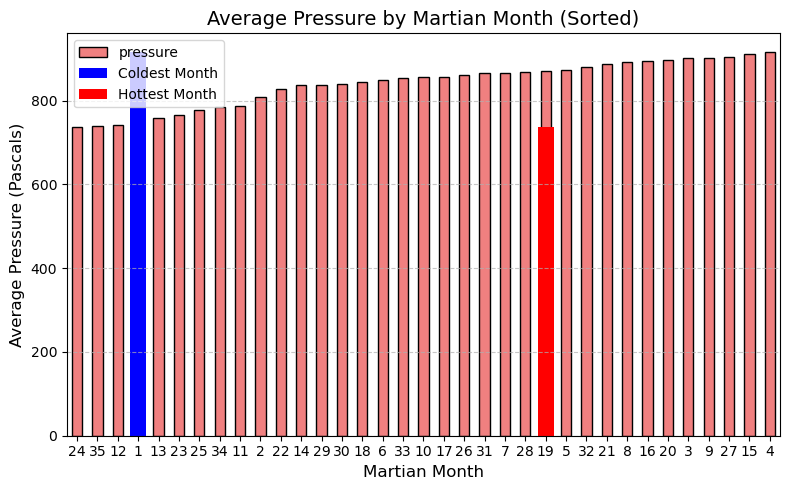

In [59]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
average_pressure_by_month = df.groupby('mars_month')['pressure'].mean()
sorted_pressure = average_pressure_by_month.sort_values()
coldest_month = sorted_pressure.idxmax()  
hottest_month = sorted_pressure.idxmin()
print(f"Coldest Month: {coldest_month}, Average Pressure: {sorted_pressure.max()} Pascals")
print(f"Hottest Month: {hottest_month}, Average Pressure: {sorted_pressure.min()} Pascals")

plt.figure(figsize=(8, 5))
sorted_pressure.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.bar(coldest_month - 1, sorted_pressure.max(), color='blue', label='Coldest Month')  
plt.bar(hottest_month - 1, sorted_pressure.min(), color='red', label='Hottest Month')

plt.title('Average Pressure by Martian Month (Sorted)', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Pressure (Pascals)', fontsize=12)
plt.xticks(rotation=0)  
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# 4. What is the average pressure by month?
average_pressure_by_month = df.groupby('mars_month')['pressure'].mean()
average_pressure_by_month

mars_month
1     750.590909
2     808.807018
3     900.421053
4     914.566667
5     871.961538
6     849.719298
7     866.734694
8     892.400000
9     900.533333
10    855.929825
11    786.105263
12    742.631579
13    757.948276
14    836.052632
15    910.491228
16    893.244898
17    855.962264
18    844.218182
19    869.684211
20    896.035088
21    888.206897
22    828.210526
23    764.709091
24    737.894737
25    776.714286
26    861.333333
27    903.228070
28    869.052632
29    837.127273
30    839.321429
31    864.894737
32    880.839286
33    852.775862
34    785.140351
35    738.677419
Name: pressure, dtype: float64

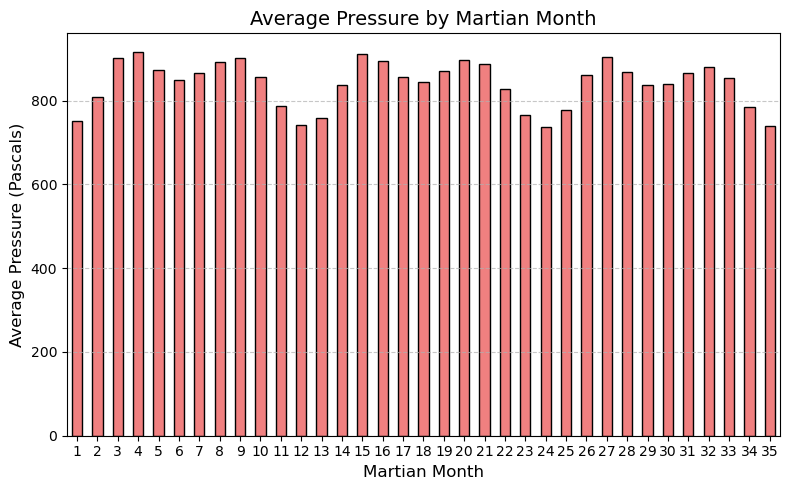

In [60]:
# Plot the average pressure by month
plt.figure(figsize=(8, 5))
average_pressure_by_month.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add plot details
plt.title('Average Pressure by Martian Month', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Pressure (Pascals)', fontsize=12)
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

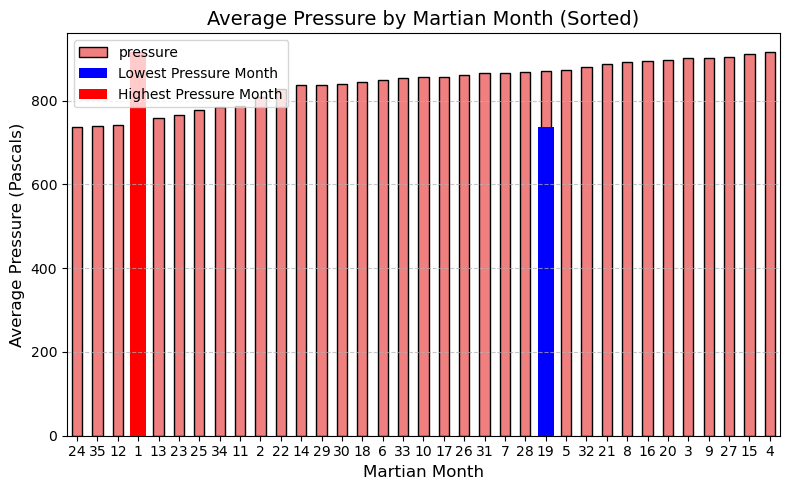

In [63]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = sorted_pressure.idxmin()  
highest_pressure_month = sorted_pressure.idxmax()
plt.figure(figsize=(8, 5))
sorted_pressure.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.bar(lowest_pressure_month - 1, sorted_pressure.min(), color='blue', label='Lowest Pressure Month')  # Adjust for zero-indexed bar positions
plt.bar(highest_pressure_month - 1, sorted_pressure.max(), color='red', label='Highest Pressure Month')


plt.title('Average Pressure by Martian Month (Sorted)', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Pressure (Pascals)', fontsize=12)
plt.xticks(rotation=0)  
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Number of Earth days in a Martian year: 705.55


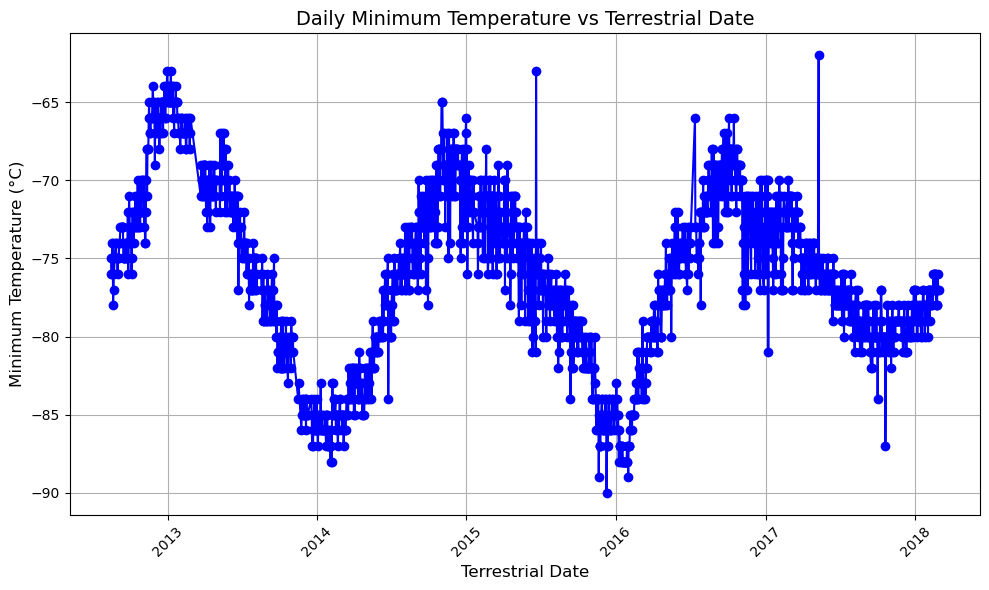

In [65]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
sol_in_earth_days = 1.027 
martian_year_in_sols = 687 

earth_days_in_martian_year = martian_year_in_sols * sol_in_earth_days
print(f"Number of Earth days in a Martian year: {earth_days_in_martian_year:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', color='b', linestyle='-', label='Daily Minimum Temperature')
plt.title('Daily Minimum Temperature vs Terrestrial Date', fontsize=14)
plt.xlabel('Terrestrial Date', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [66]:
# Write the data to a CSV
csv_file_path = 'mars_temperature_data.csv'
df.to_csv(csv_file_path, index=False)

In [67]:
browser.quit()